In [12]:
pip install tensorflow

In [13]:
pip install transformers

In [14]:
!pip install Arabic-Stopwords

In [15]:
pip install PyArabic

In [16]:
!pip install emoji

In [17]:
pip install Tashaphyne

In [18]:
pip install openpyxl

In [19]:
# pip install farasa

In [20]:
# !pip install camel-tools


In [21]:
import pandas as pd
import numpy as np

# Text preprocessing packages
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
import string
import re
import regex
import emoji
from nltk.corpus import stopwords
import arabicstopwords.arabicstopwords as stp
from nltk.stem.isri import ISRIStemmer
import pyarabic.araby as araby
from tashaphyne.stemming import ArabicLightStemmer
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk.stem.isri import ISRIStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import SnowballStemmer, WordNetLemmatizer

# from camel_tools.tokenizers.word import simple_word_tokenize
# from camel_tools.lemmatizer.default import DefaultLemmatizer

# from farasa.pos import FarasaPOSTagger
# from farasa.segmenter import FarasaSegmenter
# from farasa.ner import FarasaNamedEntityRecognizer
# from farasa.stemmer import FarasaStemmer
# from farasa.lemma import FarasaLemmatizer

# Machine Learning libraries
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import tensorflow as tf
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification, AdamWeightDecay
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping




#Visualization libraries
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
%matplotlib inline

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



## Upload datasets:


In [22]:
## Training dataset
df1_train= pd.read_csv("/train_Arabic_tweets_negative_20190413.tsv", sep='\t')
df2_train = pd.read_csv("/train_Arabic_tweets_positive_20190413.tsv", sep = '\t')

In [23]:
## name the columns of first dataset (Training)
df1_train.columns.values[0] = "Sentiment"
df1_train.columns.values[1] = "Tweet"

In [24]:
## name the columns of second dataset (Training)
df2_train.columns.values[0] = "Sentiment"
df2_train.columns.values[1] = "Tweet"

In [25]:
## Training dataset
df1_test = pd.read_csv("/test_Arabic_tweets_negative_20190413.tsv", sep='\t')
df2_test = pd.read_csv("/test_Arabic_tweets_positive_20190413.tsv", sep = '\t')

In [26]:
## name the columns of first dataset (Training)
df1_test.columns.values[0] = "Sentiment"
df1_test.columns.values[1] = "Tweet"

In [27]:
## name the columns of second dataset (Training)
df2_test.columns.values[0] = "Sentiment"
df2_test.columns.values[1] = "Tweet"

## Concatenate the datasets

In [28]:
## training dataset
data_train = pd.concat([df1_train, df2_train], ignore_index=True)
data_train

,Sentiment,Tweet
0,neg,توقعت اذا جات داريا بشوفهم كاملين بس لي للحين ...
1,neg,#الاهلي_الهلال اكتب توقعك لنتيجة لقاء الهلال و...
2,neg,نعمة المضادات الحيوية . تضع قطرة💧مضاد بنسلين ع...
3,neg,الدودو جايه تكمل علي 💔
4,neg,أحببته حتى أقنعنى إن ما فات من العمر كان إنتظا...
...,...,...
45268,pos,السحب الليلة على الايفون .. رتويت للمرفقة وطبق...
45269,pos,😂 لابسة احمر ليه يا ست انتي ايه المناسبة 😂
45270,pos,كلاام جمييل تستاهل(من احبه الله جعل محبته ف قل...
45271,pos,- ألطف صورة ممكن تعبر عن رمضان 💙


In [29]:
## Testing data set
data_test = pd.concat([df1_test, df2_test], ignore_index=True)
data_test

,Sentiment,Tweet
0,neg,واحد تبع النظام السوري يقول أن المخابرات السور...
1,neg,الى متى التعامل السئ للخادمات وعدم احترامهم وك...
2,neg,رايح جاي ي طحلبي 🐸 #الهلال_الاهلي
3,neg,تتمغط ومعها سداع 😫
4,neg,اذا ما كان ألطف كوبل مر عليكم 😭😭💛💛 حظ جانيت بس...
...,...,...
11513,pos,ربي اغفر لي و لوالدي و لأحبتي و للمؤمنين و الم...
11514,pos,ربي يسعدنا وياكم 💛
11515,pos,يتحدثون عن اخلاق حسين ونجوم فرقهم نهاياتهم الر...
11516,pos,صباحكم احتفالية لم تكتمل، وصاحب الاحتفاليه ماك...


## Exploring the training data

In [30]:
## Checking for null values for each column
data_train.isna().sum()

Sentiment    0
Tweet        0
dtype: int64

there is no null values in the dataset

In [31]:
## Checking for duplicated columns
data_train.duplicated().sum()


15721

This data have duplicated rows

In [32]:
## retive the duplicated rows
dupl_data_train = data_train[data_train['Tweet'].duplicated() == True].index
dupl_data_train

Index([   32,    41,    74,   112,   116,   147,   162,   164,   184,   200,
       ...
       45257, 45258, 45261, 45263, 45266, 45267, 45268, 45269, 45271, 45272],
      dtype='int64', length=15826)

In [33]:
# Checking for stop words
arabic_stopwords = stopwords.words("arabic")
len(arabic_stopwords)

754

There are 754 stop word in stopwords(Arabic)

In [34]:
data_train['stop_words'] = data_train['Tweet'].apply(lambda x: len(set(x.split()) & set(arabic_stopwords)))
data_train.stop_words.value_counts()

stop_words
1     12111
0     10807
2      8868
3      5591
4      4084
5      1830
6      1261
7       428
8       143
9        67
10       20
11        8
12        3
37        3
18        3
13        3
23        3
44        2
29        2
19        2
58        2
52        2
35        2
48        2
25        2
56        2
38        2
76        1
69        1
28        1
22        1
36        1
21        1
20        1
70        1
34        1
45        1
15        1
17        1
33        1
50        1
72        1
64        1
57        1
42        1
61        1
26        1
Name: count, dtype: int64

In [35]:
data_train

,Sentiment,Tweet,stop_words
0,neg,توقعت اذا جات داريا بشوفهم كاملين بس لي للحين ...,3
1,neg,#الاهلي_الهلال اكتب توقعك لنتيجة لقاء الهلال و...,2
2,neg,نعمة المضادات الحيوية . تضع قطرة💧مضاد بنسلين ع...,2
3,neg,الدودو جايه تكمل علي 💔,0
4,neg,أحببته حتى أقنعنى إن ما فات من العمر كان إنتظا...,6
...,...,...,...
45268,pos,السحب الليلة على الايفون .. رتويت للمرفقة وطبق...,1
45269,pos,😂 لابسة احمر ليه يا ست انتي ايه المناسبة 😂,2
45270,pos,كلاام جمييل تستاهل(من احبه الله جعل محبته ف قل...,2
45271,pos,- ألطف صورة ممكن تعبر عن رمضان 💙,1


<Axes: ylabel='Frequency'>

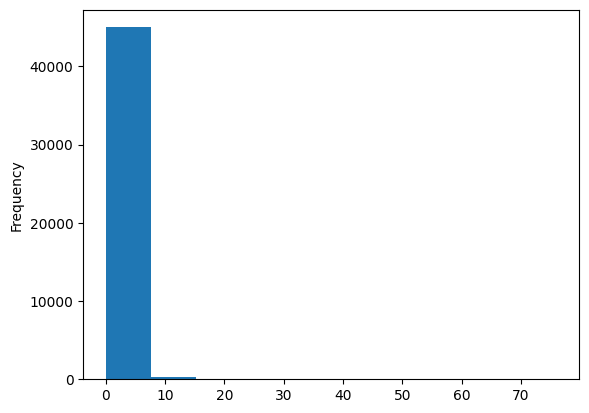

In [36]:
data_train["stop_words"].plot(kind = 'hist')

In [37]:
#to count the number of emojis in the dataset
def emoji_counter(tweet):
    return emoji.emoji_count(tweet)

data_train["Emoji_counts"] = data_train["Tweet"].apply(lambda x: emoji_counter(x))
data_train.Emoji_counts.value_counts()[:10]

Emoji_counts
1     27803
0      7525
2      3981
3      2861
4      1190
5       630
6       573
7       202
8       107
10       96
Name: count, dtype: int64

In [38]:
data_train

,Sentiment,Tweet,stop_words,Emoji_counts
0,neg,توقعت اذا جات داريا بشوفهم كاملين بس لي للحين ...,3,1
1,neg,#الاهلي_الهلال اكتب توقعك لنتيجة لقاء الهلال و...,2,1
2,neg,نعمة المضادات الحيوية . تضع قطرة💧مضاد بنسلين ع...,2,3
3,neg,الدودو جايه تكمل علي 💔,0,1
4,neg,أحببته حتى أقنعنى إن ما فات من العمر كان إنتظا...,6,1
...,...,...,...,...
45268,pos,السحب الليلة على الايفون .. رتويت للمرفقة وطبق...,1,1
45269,pos,😂 لابسة احمر ليه يا ست انتي ايه المناسبة 😂,2,2
45270,pos,كلاام جمييل تستاهل(من احبه الله جعل محبته ف قل...,2,1
45271,pos,- ألطف صورة ممكن تعبر عن رمضان 💙,1,1


In [39]:
data_train = data_train.drop(columns = ["stop_words" , "Emoji_counts"])
data_train


,Sentiment,Tweet
0,neg,توقعت اذا جات داريا بشوفهم كاملين بس لي للحين ...
1,neg,#الاهلي_الهلال اكتب توقعك لنتيجة لقاء الهلال و...
2,neg,نعمة المضادات الحيوية . تضع قطرة💧مضاد بنسلين ع...
3,neg,الدودو جايه تكمل علي 💔
4,neg,أحببته حتى أقنعنى إن ما فات من العمر كان إنتظا...
...,...,...
45268,pos,السحب الليلة على الايفون .. رتويت للمرفقة وطبق...
45269,pos,😂 لابسة احمر ليه يا ست انتي ايه المناسبة 😂
45270,pos,كلاام جمييل تستاهل(من احبه الله جعل محبته ف قل...
45271,pos,- ألطف صورة ممكن تعبر عن رمضان 💙


## Exploring the testing data

In [40]:
## Checking for null values for each column
data_test.isna().sum()

Sentiment    0
Tweet        0
dtype: int64

In [41]:
## Checking for duplicated columns
data_test.duplicated().sum()

2678

In [42]:
## retive the duplicated rows
dupl_data_test = data_test[data_test['Tweet'].duplicated() == True].index
dupl_data_test

Index([   47,    65,    66,    69,   143,   145,   153,   198,   200,   216,
       ...
       11483, 11485, 11492, 11494, 11496, 11502, 11507, 11511, 11515, 11516],
      dtype='int64', length=2702)

In [43]:
data_test['stop_words'] = data_test['Tweet'].apply(lambda x: len(set(x.split()) & set(arabic_stopwords)))
data_test.stop_words.value_counts()

stop_words
1     3073
0     2757
2     2315
3     1385
4     1020
5      460
6      334
7      100
8       34
9       24
10       7
29       2
24       2
56       1
60       1
11       1
16       1
35       1
Name: count, dtype: int64

In [44]:
data_test

,Sentiment,Tweet,stop_words
0,neg,واحد تبع النظام السوري يقول أن المخابرات السور...,4
1,neg,الى متى التعامل السئ للخادمات وعدم احترامهم وك...,2
2,neg,رايح جاي ي طحلبي 🐸 #الهلال_الاهلي,1
3,neg,تتمغط ومعها سداع 😫,0
4,neg,اذا ما كان ألطف كوبل مر عليكم 😭😭💛💛 حظ جانيت بس...,3
...,...,...,...
11513,pos,ربي اغفر لي و لوالدي و لأحبتي و للمؤمنين و الم...,2
11514,pos,ربي يسعدنا وياكم 💛,0
11515,pos,يتحدثون عن اخلاق حسين ونجوم فرقهم نهاياتهم الر...,3
11516,pos,صباحكم احتفالية لم تكتمل، وصاحب الاحتفاليه ماك...,1


<Axes: ylabel='Frequency'>

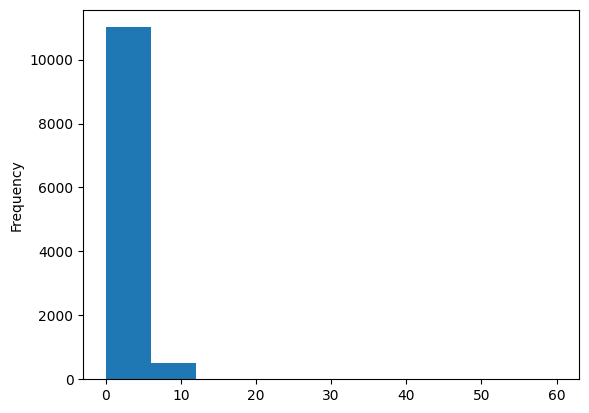

In [45]:
data_test["stop_words"].plot(kind = 'hist')

In [46]:
#to count the number of emojis in the dataset
def emoji_counter(tweet):
    return emoji.emoji_count(tweet)

data_test["Emoji_counts"] = data_test["Tweet"].apply(lambda x: emoji_counter(x))
data_test.Emoji_counts.value_counts()[:10]

Emoji_counts
1     7125
0     1871
2      997
3      753
4      295
5      150
6      134
7       67
8       28
10      24
Name: count, dtype: int64

In [47]:
data_test

,Sentiment,Tweet,stop_words,Emoji_counts
0,neg,واحد تبع النظام السوري يقول أن المخابرات السور...,4,1
1,neg,الى متى التعامل السئ للخادمات وعدم احترامهم وك...,2,0
2,neg,رايح جاي ي طحلبي 🐸 #الهلال_الاهلي,1,1
3,neg,تتمغط ومعها سداع 😫,0,1
4,neg,اذا ما كان ألطف كوبل مر عليكم 😭😭💛💛 حظ جانيت بس...,3,5
...,...,...,...,...
11513,pos,ربي اغفر لي و لوالدي و لأحبتي و للمؤمنين و الم...,2,0
11514,pos,ربي يسعدنا وياكم 💛,0,1
11515,pos,يتحدثون عن اخلاق حسين ونجوم فرقهم نهاياتهم الر...,3,0
11516,pos,صباحكم احتفالية لم تكتمل، وصاحب الاحتفاليه ماك...,1,1


In [48]:
data_test = data_test.drop(columns = ["stop_words" , "Emoji_counts"])
data_test

,Sentiment,Tweet
0,neg,واحد تبع النظام السوري يقول أن المخابرات السور...
1,neg,الى متى التعامل السئ للخادمات وعدم احترامهم وك...
2,neg,رايح جاي ي طحلبي 🐸 #الهلال_الاهلي
3,neg,تتمغط ومعها سداع 😫
4,neg,اذا ما كان ألطف كوبل مر عليكم 😭😭💛💛 حظ جانيت بس...
...,...,...
11513,pos,ربي اغفر لي و لوالدي و لأحبتي و للمؤمنين و الم...
11514,pos,ربي يسعدنا وياكم 💛
11515,pos,يتحدثون عن اخلاق حسين ونجوم فرقهم نهاياتهم الر...
11516,pos,صباحكم احتفالية لم تكتمل، وصاحب الاحتفاليه ماك...


# Data Cleaning

## In data pre-proccessing i will do:
#### 1- Remove duplicates.
#### 2- Remove Stop words.
#### 3- Convert emojies into text.
#### 4- Remove punctuations.
#### 5- Remove special characters("@", "#",... ).
#### 6- Remove non-Arabic words.
#### 7- Remove URLs.
#### 8- Remove numbers.
#### 9- Remove Diacritics(Tashkeel).
#### 10- Remove repetetions.


# **Remove Duplicates**


In [49]:
## Remove Duplicates for train data
data_train.drop(dupl_data_train, axis = 0, inplace = True)


In [50]:
data_train.duplicated().sum()

0

In [51]:
## Remove Duplicates for test data
data_test.drop(dupl_data_test, axis = 0, inplace = True)

In [52]:
data_test.duplicated().sum()

0

In [53]:
## the shape of train data after removing all duplicates rows
data_train.shape

(29447, 2)

In [54]:
## the shape of test data after removing all duplicates rows
data_test.shape

(8816, 2)

# **Remove stop words**

In [55]:
#  Function to remove stop words from columns
def remove_stopwords(tweet):
    tokens = tweet.split()
    filtered_tokens = [word for word in tokens if word not in arabic_stopwords]
    return ' '.join(filtered_tokens)


data_train["Tweet"] = data_train["Tweet"].apply(remove_stopwords)
data_test["Tweet"] = data_test["Tweet"].apply(remove_stopwords)

In [56]:
data_train

,Sentiment,Tweet
0,neg,توقعت اذا جات داريا بشوفهم كاملين للحين احس اح...
1,neg,#الاهلي_الهلال اكتب توقعك لنتيجة لقاء الهلال و...
2,neg,نعمة المضادات الحيوية . تضع قطرة💧مضاد بنسلين ب...
3,neg,الدودو جايه تكمل علي 💔
4,neg,أحببته أقنعنى فات العمر إنتظار 🙈
...,...,...
45260,pos,دايما شغلهم بأماكن حقيقية ومافيه فوتوشوب حطوا ...
45262,pos,ستفرج بطريقة يعجز عقلك إستيعابها، بإذن الله 💛
45264,pos,العميد مراح نقول عنه شي 🙂 المساكين الي متحمسين...
45265,pos,- سبيل إعادة التدوير 🌸 #أدوات_تعزز_الإستدامة ♻️


In [57]:
data_test

,Sentiment,Tweet
0,neg,تبع النظام السوري يقول المخابرات السورية وراء ...
1,neg,الى التعامل السئ للخادمات وعدم احترامهم وكأنهم...
2,neg,رايح جاي طحلبي 🐸 #الهلال_الاهلي
3,neg,تتمغط ومعها سداع 😫
4,neg,اذا ألطف كوبل مر عليكم 😭😭💛💛 حظ جانيت بسماء لاي...
...,...,...
11510,pos,دقله 😂
11512,pos,مشية فرس 💞
11513,pos,ربي اغفر لوالدي لأحبتي للمؤمنين المؤمنات المسل...
11514,pos,ربي يسعدنا وياكم 💛


# **Convert Emojis into text**


In [58]:
## Arabic describtion for Emojis
emojis_to_arabic = {
    "🙂":"يبتسم",
    "😂":"يضحك",
    "💔":"قلب حزين",
    "🙂":"يبتسم",
    "❤️":"حب",
    "❤":"حب",
    "😍":"حب",
    "😭":"يبكي",
    "😢":"حزن",
    "😔":"حزن",
    "♥":"حب",
    "💜":"حب",
    "😅":"يضحك",
    "🙁":"حزين",
    "💕":"حب",
    "💙":"حب",
    "😞":"حزين",
    "😊":"سعادة",
    "👏":"يصفق",
    "👌":"احسنت",
    "😴":"ينام",
    "😀":"يضحك",
    "😌":"حزين",
    "🌹":"وردة",
    "🙈":"حب",
    "😄":"يضحك",
    "😐":"محايد",
    "✌":"منتصر",
    "✨":"نجمه",
    "🤔":"تفكير",
    "😏":"يستهزء",
    "😒":"يستهزء",
    "🙄":"ملل",
    "😕":"عصبية",
    "😃":"يضحك",
    "🌸":"وردة",
    "😓":"حزن",
    "💞":"حب",
    "💗":"حب",
    "😑":"منزعج",
    "💭":"تفكير",
    "😎":"ثقة",
    "💛":"حب",
    "😩":"حزين",
    "💪":"عضلات",
    "👍":"موافق",
    "🙏🏻":"رجاء طلب",
    "😳":"مصدوم",
    "👏🏼":"تصفيق",
    "🎶":"موسيقي",
    "🌚":"صمت",
    "💚":"حب",
    "🙏":"رجاء طلب",
    "💘":"حب",
    "🍃":"سلام",
    "☺":"يضحك",
    "🐸":"ضفدع",
    "😶":"مصدوم",
    "✌️":"مرح",
    "✋🏻":"توقف",
    "😉":"غمزة",
    "🌷":"حب",
    "🙃":"مبتسم",
    "😫":"حزين",
    "😨":"مصدوم",
    "🎼 ":"موسيقي",
    "🍁":"مرح",
    "🍂":"مرح",
    "💟":"حب",
    "😪":"حزن",
    "😆":"يضحك",
    "😣":"استياء",
    "☺️":"حب",
    "😱":"كارثة",
    "😁":"يضحك",
    "😖":"استياء",
    "🏃🏼":"يجري",
    "😡":"غضب",
    "🚶":"يسير",
    "🤕":"مرض",
    "‼️":"تعجب",
    "🕊":"طائر",
    "👌🏻":"احسنت",
    "❣":"حب",
    "🙊":"مصدوم",
    "💃":"سعادة مرح",
    "💃🏼":"سعادة مرح",
    "😜":"مرح",
    "👊":"ضربة",
    "😟":"استياء",
    "💖":"حب",
    "😥":"حزن",
    "🎻":"موسيقي",
    "✒":"يكتب",
    "🚶🏻":"يسير",
    "💎":"الماظ",
    "😷":"وباء مرض",
    "☝":"واحد",
    "🚬":"تدخين",
    "💐" : "ورد",
    "🌞" : "شمس",
    "👆" : "الاول",
    "⚠️" :"تحذير",
    "🤗" : "احتواء",
    "✖️": "غلط",
    "📍"  : "مكان",
    "👸" : "ملكه",
    "👑" : "تاج",
    "✔️" : "صح",
    "💌": "قلب",
    "😲" : "مندهش",
    "💦": "ماء",
    "🚫" : "خطا",
    "👏🏻" : "برافو",
    "🏊" :"يسبح",
    "👍🏻": "تمام",
    "⭕️" :"دائره كبيره",
    "🎷" : "ساكسفون",
    "👋": "تلويح باليد",
    "✌🏼": "علامه النصر",
    "🌝":"مبتسم",
    "➿"  : "عقده مزدوجه",
    "💪🏼" : "قوي",
    "📩":  "تواصل معي",
    "☕️": "قهوه",
    "😧" : "قلق و صدمة",
    "🗨": "رسالة",
    "❗️" :"تعجب",
    "🙆🏻": "اشاره موافقه",
    "👯" :"اخوات",
    "©" :  "رمز",
    "👵🏽" :"سيده عجوزه",
    "🐣": "كتكوت",
    "🙌": "تشجيع",
    "🙇": "شخص ينحني",
    "👐🏽":"ايدي مفتوحه",
    "👌🏽": "بالظبط",
    "⁉️" : "استنكار",
    "⚽️": "كوره",
    "🕶" :"حب",
    "🎈" :"بالون",
    "🎀":    "ورده",
    "💵":  "فلوس",
    "😋":  "جائع",
    "😛":  "يغيظ",
    "😠":  "غاضب",
    "✍🏻":  "يكتب",
    "🌾":  "ارز",
    "👣":  "اثر قدمين",
    "❌":"رفض",
    "🍟":"طعام",
    "👬":"صداقة",
    "🐰":"ارنب",
    "☂":"مطر",
    "⚜":"مملكة فرنسا",
    "🐑":"خروف",
    "🗣":"صوت مرتفع",
    "👌🏼":"احسنت",
    "☘":"مرح",
    "😮":"صدمة",
    "😦":"قلق",
    "⭕":"الحق",
    "✏️":"قلم",
    "ℹ":"معلومات",
    "🙍🏻":"رفض",
    "⚪️":"نضارة نقاء",
    "🐤":"حزن",
    "💫":"مرح",
    "💝":"حب",
    "🍔":"طعام",
    "❤︎":"حب",
    "✈️":"سفر",
    "🏃🏻‍♀️":"يسير",
    "🍳":"ذكر",
    "🎤":"مايك غناء",
    "🎾":"كره",
    "🐔":"دجاجة",
    "🙋":"سؤال",
    "📮":"بحر",
    "💉":"دواء",
    "🙏🏼":"رجاء طلب",
    "💂🏿 ":"حارس",
    "🎬":"سينما",
    "♦️":"مرح",
    "💡":"قكرة",
    "‼":"تعجب",
    "👼":"طفل",
    "🔑":"مفتاح",
    "♥️":"حب",
    "🕋":"كعبة",
    "🐓":"دجاجة",
    "💩":"معترض",
    "👽":"فضائي",
    "☔️":"مطر",
    "🍷":"عصير",
    "🌟":"نجمة",
    "☁️":"سحب",
    "👃":"معترض",
    "🌺":"مرح",
    "🔪":"سكينة",
    "♨":"سخونية",
    "👊🏼":"ضرب",
    "✏":"قلم",
    "🚶🏾‍♀️":"يسير",
    "👊":"ضربة",
    "◾️":"وقف",
    "😚":"حب",
    "🔸":"مرح",
    "👎🏻":"لا يعجبني",
    "👊🏽":"ضربة",
    "😙":"حب",
    "🎥":"تصوير",
    "👉":"جذب انتباه",
    "👏🏽":"يصفق",
    "💪🏻":"عضلات",
    "🏴":"اسود",
    "🔥":"حريق",
    "😬":"عدم الراحة",
    "👊🏿":"يضرب",
    "🌿":"ورقه شجره",
    "✋🏼":"كف ايد",
    "👐":"ايدي مفتوحه",
    "☠️":"وجه مرعب",
    "🎉":"يهنئ",
    "🔕" :"صامت",
    "😿":"وجه حزين",
    "☹️":"وجه يائس",
    "😘" :"حب",
    "😰" :"خوف و حزن",
    "🌼":"ورده",
    "💋":  "بوسه",
    "👇":"لاسفل",
    "❣️":"حب",
    "🎧":"سماعات",
    "📝":"يكتب",
    "😇":"دايخ",
    "😈":"رعب",
    "🏃":"يجري",
    "✌🏻":"علامه النصر",
    "🔫":"يضرب",
    "❗️":"تعجب",
    "👎":"غير موافق",
    "🔐":"قفل",
    "👈":"لليمين",
    "™":"رمز",
    "🚶🏽":"يتمشي",
    "😯":"متفاجأ",
    "✊":"يد مغلقه",
    "😻":"اعجاب",
    "🙉" :"قرد",
    "👧":"طفله صغيره",
    "🔴":"دائره حمراء",
    "💪🏽":"قوه",
    "💤":"ينام",
    "👀":"ينظر",
    "✍🏻":"يكتب",
    "❄️":"تلج",
    "💀":"رعب",
    "😤":"وجه عابس",
    "🖋":"قلم",
    "🎩":"كاب",
    "☕️":"قهوه",
    "😹":"ضحك",
    "💓":"حب",
    "☄️ ":"نار",
    "👻":"رعب",
    "💧": "نقطه ماء"
    }


In [59]:
def replace_emojis_with_text(text):

    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # Emoticons
        "\U0001F300-\U0001F5FF"  # Symbols & Pictographs
        "\U0001F680-\U0001F6FF"  # Transport & Map symbols
        "\U0001F700-\U0001F77F"  # Alchemical symbols
        "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
        "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
        "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        "\U0001FA00-\U0001FA6F"  # Chess Symbols
        "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        "\U00002702-\U000027B0"  # Dingbats
        "\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE
    )

    def emoji_replacer(match):
        emoji = match.group(0)
        # Replace emoji with its Arabic description
        return emojis_to_arabic.get(emoji, emoji)

    return emoji_pattern.sub(emoji_replacer, text)



data_train["Tweet"] = data_train["Tweet"].apply(replace_emojis_with_text)
data_test["Tweet"] = data_test["Tweet"].apply(replace_emojis_with_text)

In [60]:
data_train

,Sentiment,Tweet
0,neg,توقعت اذا جات داريا بشوفهم كاملين للحين احس اح...
1,neg,#الاهلي_الهلال اكتب توقعك لنتيجة لقاء الهلال و...
2,neg,نعمة المضادات الحيوية . تضع قطرةنقطه ماءمضاد ب...
3,neg,الدودو جايه تكمل علي قلب حزين
4,neg,أحببته أقنعنى فات العمر إنتظار حب
...,...,...
45260,pos,دايما شغلهم بأماكن حقيقية ومافيه فوتوشوب حطوا ...
45262,pos,ستفرج بطريقة يعجز عقلك إستيعابها، بإذن الله حب
45264,pos,العميد مراح نقول عنه شي يبتسم المساكين الي متح...
45265,pos,- سبيل إعادة التدوير وردة #أدوات_تعزز_الإستدام...


In [61]:
data_test

,Sentiment,Tweet
0,neg,تبع النظام السوري يقول المخابرات السورية وراء ...
1,neg,الى التعامل السئ للخادمات وعدم احترامهم وكأنهم...
2,neg,رايح جاي طحلبي ضفدع #الهلال_الاهلي
3,neg,تتمغط ومعها سداع حزين
4,neg,اذا ألطف كوبل مر عليكم 😭😭💛💛 حظ جانيت بسماء لاي...
...,...,...
11510,pos,دقله يضحك
11512,pos,مشية فرس حب
11513,pos,ربي اغفر لوالدي لأحبتي للمؤمنين المؤمنات المسل...
11514,pos,ربي يسعدنا وياكم حب


# **Remove Puctuations**

In [62]:
from typing import Pattern
def remove_punctuation(text):
    pattern = r'[،؛؟.!«»]'
    # Substitute any punctuation character with an empty string
    clean_text = re.sub(pattern, '', text)
    return clean_text
data_train["Tweet"] = data_train["Tweet"].apply(remove_punctuation)
data_train["Tweet"] = data_train["Tweet"].apply(remove_punctuation)

In [63]:
data_train

,Sentiment,Tweet
0,neg,توقعت اذا جات داريا بشوفهم كاملين للحين احس اح...
1,neg,#الاهلي_الهلال اكتب توقعك لنتيجة لقاء الهلال و...
2,neg,نعمة المضادات الحيوية تضع قطرةنقطه ماءمضاد بن...
3,neg,الدودو جايه تكمل علي قلب حزين
4,neg,أحببته أقنعنى فات العمر إنتظار حب
...,...,...
45260,pos,دايما شغلهم بأماكن حقيقية ومافيه فوتوشوب حطوا ...
45262,pos,ستفرج بطريقة يعجز عقلك إستيعابها بإذن الله حب
45264,pos,العميد مراح نقول عنه شي يبتسم المساكين الي متح...
45265,pos,- سبيل إعادة التدوير وردة #أدوات_تعزز_الإستدام...


In [64]:
data_test

,Sentiment,Tweet
0,neg,تبع النظام السوري يقول المخابرات السورية وراء ...
1,neg,الى التعامل السئ للخادمات وعدم احترامهم وكأنهم...
2,neg,رايح جاي طحلبي ضفدع #الهلال_الاهلي
3,neg,تتمغط ومعها سداع حزين
4,neg,اذا ألطف كوبل مر عليكم 😭😭💛💛 حظ جانيت بسماء لاي...
...,...,...
11510,pos,دقله يضحك
11512,pos,مشية فرس حب
11513,pos,ربي اغفر لوالدي لأحبتي للمؤمنين المؤمنات المسل...
11514,pos,ربي يسعدنا وياكم حب


# **Remove Special Character**

In [65]:
## Remove special chracters
def remove_special_Char(text):
    pattern = r'[^؀-ۿ\s\d]'
    clean_text = re.sub(pattern, ' ', text)
    return clean_text

data_train["Tweet"] = data_train["Tweet"].apply(remove_special_Char)
data_test["Tweet"] = data_test["Tweet"].apply(remove_special_Char)

In [66]:
data_train

,Sentiment,Tweet
0,neg,توقعت اذا جات داريا بشوفهم كاملين للحين احس اح...
1,neg,الاهلي الهلال اكتب توقعك لنتيجة لقاء الهلال و...
2,neg,نعمة المضادات الحيوية تضع قطرةنقطه ماءمضاد بن...
3,neg,الدودو جايه تكمل علي قلب حزين
4,neg,أحببته أقنعنى فات العمر إنتظار حب
...,...,...
45260,pos,دايما شغلهم بأماكن حقيقية ومافيه فوتوشوب حطوا ...
45262,pos,ستفرج بطريقة يعجز عقلك إستيعابها بإذن الله حب
45264,pos,العميد مراح نقول عنه شي يبتسم المساكين الي متح...
45265,pos,سبيل إعادة التدوير وردة أدوات تعزز الإستدام...


In [67]:
data_test.head()

,Sentiment,Tweet
0,neg,تبع النظام السوري يقول المخابرات السورية وراء ...
1,neg,الى التعامل السئ للخادمات وعدم احترامهم وكأنهم...
2,neg,رايح جاي طحلبي ضفدع الهلال الاهلي
3,neg,تتمغط ومعها سداع حزين
4,neg,اذا ألطف كوبل مر عليكم حظ جانيت بسماء لاي...


# **Remove non-Arabic words**

In [68]:
def remove_non_arabic(text):
    text = re.sub('[A-Za-z]+',' ',text)
    return text

data_train["Tweet"] = data_train["Tweet"].apply(remove_non_arabic)
data_test["Tweet"] = data_test["Tweet"].apply(remove_non_arabic)

In [69]:
data_train

,Sentiment,Tweet
0,neg,توقعت اذا جات داريا بشوفهم كاملين للحين احس اح...
1,neg,الاهلي الهلال اكتب توقعك لنتيجة لقاء الهلال و...
2,neg,نعمة المضادات الحيوية تضع قطرةنقطه ماءمضاد بن...
3,neg,الدودو جايه تكمل علي قلب حزين
4,neg,أحببته أقنعنى فات العمر إنتظار حب
...,...,...
45260,pos,دايما شغلهم بأماكن حقيقية ومافيه فوتوشوب حطوا ...
45262,pos,ستفرج بطريقة يعجز عقلك إستيعابها بإذن الله حب
45264,pos,العميد مراح نقول عنه شي يبتسم المساكين الي متح...
45265,pos,سبيل إعادة التدوير وردة أدوات تعزز الإستدام...


In [70]:
data_test

,Sentiment,Tweet
0,neg,تبع النظام السوري يقول المخابرات السورية وراء ...
1,neg,الى التعامل السئ للخادمات وعدم احترامهم وكأنهم...
2,neg,رايح جاي طحلبي ضفدع الهلال الاهلي
3,neg,تتمغط ومعها سداع حزين
4,neg,اذا ألطف كوبل مر عليكم حظ جانيت بسماء لاي...
...,...,...
11510,pos,دقله يضحك
11512,pos,مشية فرس حب
11513,pos,ربي اغفر لوالدي لأحبتي للمؤمنين المؤمنات المسل...
11514,pos,ربي يسعدنا وياكم حب


# **Remove URLs**


In [71]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

data_train["Tweet"] = data_train["Tweet"].apply(remove_urls)
data_test["Tweet"] = data_test["Tweet"].apply(remove_urls)

In [72]:
data_train

,Sentiment,Tweet
0,neg,توقعت اذا جات داريا بشوفهم كاملين للحين احس اح...
1,neg,الاهلي الهلال اكتب توقعك لنتيجة لقاء الهلال و...
2,neg,نعمة المضادات الحيوية تضع قطرةنقطه ماءمضاد بن...
3,neg,الدودو جايه تكمل علي قلب حزين
4,neg,أحببته أقنعنى فات العمر إنتظار حب
...,...,...
45260,pos,دايما شغلهم بأماكن حقيقية ومافيه فوتوشوب حطوا ...
45262,pos,ستفرج بطريقة يعجز عقلك إستيعابها بإذن الله حب
45264,pos,العميد مراح نقول عنه شي يبتسم المساكين الي متح...
45265,pos,سبيل إعادة التدوير وردة أدوات تعزز الإستدام...


In [73]:
data_test

,Sentiment,Tweet
0,neg,تبع النظام السوري يقول المخابرات السورية وراء ...
1,neg,الى التعامل السئ للخادمات وعدم احترامهم وكأنهم...
2,neg,رايح جاي طحلبي ضفدع الهلال الاهلي
3,neg,تتمغط ومعها سداع حزين
4,neg,اذا ألطف كوبل مر عليكم حظ جانيت بسماء لاي...
...,...,...
11510,pos,دقله يضحك
11512,pos,مشية فرس حب
11513,pos,ربي اغفر لوالدي لأحبتي للمؤمنين المؤمنات المسل...
11514,pos,ربي يسعدنا وياكم حب


# **Remove numbers**


In [74]:
# Remove numbers
def remove_num(text):
    text = re.sub(r'\d+', '', text)
    return text

data_train["Tweet"] = data_train["Tweet"].apply(remove_num)
data_test["Tweet"] = data_test["Tweet"].apply(remove_num)

In [75]:
data_train

,Sentiment,Tweet
0,neg,توقعت اذا جات داريا بشوفهم كاملين للحين احس اح...
1,neg,الاهلي الهلال اكتب توقعك لنتيجة لقاء الهلال و...
2,neg,نعمة المضادات الحيوية تضع قطرةنقطه ماءمضاد بن...
3,neg,الدودو جايه تكمل علي قلب حزين
4,neg,أحببته أقنعنى فات العمر إنتظار حب
...,...,...
45260,pos,دايما شغلهم بأماكن حقيقية ومافيه فوتوشوب حطوا ...
45262,pos,ستفرج بطريقة يعجز عقلك إستيعابها بإذن الله حب
45264,pos,العميد مراح نقول عنه شي يبتسم المساكين الي متح...
45265,pos,سبيل إعادة التدوير وردة أدوات تعزز الإستدام...


In [76]:
data_test

,Sentiment,Tweet
0,neg,تبع النظام السوري يقول المخابرات السورية وراء ...
1,neg,الى التعامل السئ للخادمات وعدم احترامهم وكأنهم...
2,neg,رايح جاي طحلبي ضفدع الهلال الاهلي
3,neg,تتمغط ومعها سداع حزين
4,neg,اذا ألطف كوبل مر عليكم حظ جانيت بسماء لاي...
...,...,...
11510,pos,دقله يضحك
11512,pos,مشية فرس حب
11513,pos,ربي اغفر لوالدي لأحبتي للمؤمنين المؤمنات المسل...
11514,pos,ربي يسعدنا وياكم حب


# **Remove repetetions**

In [77]:
## Remove_repetetions
def remove_repetetions(text):

    text = text.strip()
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)

    text = re.sub("[إأٱآا]", "ا", text)
    text = text.replace('وو', 'و')
    text = text.replace('يي', 'ي')
    text = text.replace('ييي', 'ي')
    text = text.replace('اا', 'ا')


    return text

data_train["Tweet"] = data_train["Tweet"].apply(remove_repetetions)
data_test["Tweet"] = data_test["Tweet"].apply(remove_repetetions)

In [78]:
data_train

,Sentiment,Tweet
0,neg,توقعت اذا جات داريا بشوفهم كاملين للحين احس اح...
1,neg,الاهلي الهلال اكتب توقعك لنتيجه لقاء الهلال وا...
2,neg,نعمه المضادات الحيويه تضع قطرهنقطه ماءمضاد بن...
3,neg,الدودو جايه تكمل علي قلب حزين
4,neg,احببته اقنعني فات العمر انتظار حب
...,...,...
45260,pos,دايما شغلهم باماكن حقيقيه ومافيه فوتوشوب حطوا ...
45262,pos,ستفرج بطريقه يعجز عقلك استيعابها باذن الله حب
45264,pos,العميد مراح نقول عنه شي يبتسم المساكين الي متح...
45265,pos,سبيل اعاده التدوير ورده ادوات تعزز الاستدامه


In [79]:
data_test

,Sentiment,Tweet
0,neg,تبع النظام السوري يقول المخابرات السوريه وراء ...
1,neg,الي التعامل السء للخادمات وعدم احترامهم وكانهم...
2,neg,رايح جاي طحلبي ضفدع الهلال الاهلي
3,neg,تتمغط ومعها سداع حزين
4,neg,اذا الطف كوبل مر عليكم حظ جانيت بسماء لاي...
...,...,...
11510,pos,دقله يضحك
11512,pos,مشيه فرس حب
11513,pos,ربي اغفر لوالدي لاحبتي للمءمنين المءمنات المسل...
11514,pos,ربي يسعدنا وياكم حب


# **Remove diacritics(Tashkeel)**

In [80]:
# Remove diacritics(Tashkeel)
def remove_diacritics(text):

    text = re.sub(r'[\u0617-\u061A\u064B-\u0652]', '', text)

    text = re.sub('\s+', ' ', text)
    text =  " ".join(text.split())
    return text.strip()

    return text

data_train["Tweet"] = data_train["Tweet"].apply(remove_diacritics)
data_test["Tweet"] = data_test["Tweet"].apply(remove_diacritics)

In [81]:
data_train

,Sentiment,Tweet
0,neg,توقعت اذا جات داريا بشوفهم كاملين للحين احس اح...
1,neg,الاهلي الهلال اكتب توقعك لنتيجه لقاء الهلال وا...
2,neg,نعمه المضادات الحيويه تضع قطرهنقطه ماءمضاد بنس...
3,neg,الدودو جايه تكمل علي قلب حزين
4,neg,احببته اقنعني فات العمر انتظار حب
...,...,...
45260,pos,دايما شغلهم باماكن حقيقيه ومافيه فوتوشوب حطوا ...
45262,pos,ستفرج بطريقه يعجز عقلك استيعابها باذن الله حب
45264,pos,العميد مراح نقول عنه شي يبتسم المساكين الي متح...
45265,pos,سبيل اعاده التدوير ورده ادوات تعزز الاستدامه


In [82]:
data_test

,Sentiment,Tweet
0,neg,تبع النظام السوري يقول المخابرات السوريه وراء ...
1,neg,الي التعامل السء للخادمات وعدم احترامهم وكانهم...
2,neg,رايح جاي طحلبي ضفدع الهلال الاهلي
3,neg,تتمغط ومعها سداع حزين
4,neg,اذا الطف كوبل مر عليكم حظ جانيت بسماء لايح حزن...
...,...,...
11510,pos,دقله يضحك
11512,pos,مشيه فرس حب
11513,pos,ربي اغفر لوالدي لاحبتي للمءمنين المءمنات المسل...
11514,pos,ربي يسعدنا وياكم حب


# Data Pre-processing

#### 1- Tokenization.
#### 2- Stemmering.

## Tokenization and Stemmering:

In [83]:
# Initialize the ISRI stemmer
stemmer = ISRIStemmer()

# tokenize and stem
def tokenize_and_stem(tweet):
    words = nltk.word_tokenize(tweet)
    stems = [stemmer.stem(word) for word in words]
    return stems

data_train['Tweet'] = data_train['Tweet'].apply(tokenize_and_stem)
data_test['Tweet'] = data_test['Tweet'].apply(tokenize_and_stem)

In [84]:
data_train

,Sentiment,Tweet
0,neg,"[وقع, اذا, جات, دار, بشف, كمل, حين, احس, احد, ..."
1,neg,"[اهل, هلل, كتب, وقع, نتج, لقء, هلل, اهل, تاق, ..."
2,neg,"[نعم, ضاد, حيي, تضع, قطرهنقطه, ماءمضاد, نسل, ك..."
3,neg,"[دودو, جيه, كمل, علي, قلب, حزن]"
4,neg,"[حبب, قنع, فات, عمر, نظر, حب]"
...,...,...
45260,pos,"[داي, شغل, بما, حقق, ومف, وشب, حطا, يصر, جزء, ..."
45262,pos,"[فرج, طرق, عجز, عقل, يعب, بذن, الل, حب]"
45264,pos,"[عمد, راح, نقل, عنه, شي, بسم, ساك, الي, تحمس, ..."
45265,pos,"[سبل, عده, دور, ورد, ادو, عزز, دام]"


In [85]:
data_test

,Sentiment,Tweet
0,neg,"[تبع, نظم, سور, يقل, خبر, سور, ورء, حطم, ركب, ..."
1,neg,"[الي, عمل, لسء, خدم, عدم, حرم, وكن, حشر, ولل, ..."
2,neg,"[ريح, جاي, طحلب, ضفدع, هلل, اهل]"
3,neg,"[مغط, ومع, سدع, حزن]"
4,neg,"[اذا, لطف, كوبل, مر, علي, حظ, جني, سمء, ليح, ح..."
...,...,...
11510,pos,"[دقل, يضح]"
11512,pos,"[شيه, فرس, حب]"
11513,pos,"[ربي, غفر, للد, لحب, ءمن, ءمن, سلم, سلم, حيء, ..."
11514,pos,"[ربي, سعد, ويا, حب]"


In [86]:
def join_tokens(tokens):
    return ' '.join(tokens)

# Apply the join function to each preprocessed tweet
data_train['Tweet'] = data_train['Tweet'].apply(join_tokens)
data_test['Tweet'] = data_test['Tweet'].apply(join_tokens)

In [87]:
data_train

,Sentiment,Tweet
0,neg,وقع اذا جات دار بشف كمل حين احس احد نقص قلب حزن
1,neg,اهل هلل كتب وقع نتج لقء هلل اهل تاق سفل تحد سر...
2,neg,نعم ضاد حيي تضع قطرهنقطه ماءمضاد نسل كتر فجر ت...
3,neg,دودو جيه كمل علي قلب حزن
4,neg,حبب قنع فات عمر نظر حب
...,...,...
45260,pos,داي شغل بما حقق ومف وشب حطا يصر جزء سسط جدا سا...
45262,pos,فرج طرق عجز عقل يعب بذن الل حب
45264,pos,عمد راح نقل عنه شي بسم ساك الي تحمس برا كثر تح...
45265,pos,سبل عده دور ورد ادو عزز دام


# Modeling

## Feature Extraction

In [88]:
# train dataset
label_encoder = preprocessing.LabelEncoder()
data_train['sentiment_encoded'] = label_encoder.fit_transform(data_train['Sentiment'])
encoded_values = data_train['sentiment_encoded'].unique()
encoded_label_mapping = {}

for encoded_value in encoded_values:
    original_label = data_train[data_train['sentiment_encoded'] == encoded_value]['Sentiment'].iloc[0]
    encoded_label_mapping[encoded_value] = original_label

for encoded_value, original_label in encoded_label_mapping.items():
    print(f"Encoded value: {encoded_value} corresponds to label: {original_label}")

data_train


Encoded value: 0 corresponds to label: neg
Encoded value: 1 corresponds to label: pos


,Sentiment,Tweet,sentiment_encoded
0,neg,وقع اذا جات دار بشف كمل حين احس احد نقص قلب حزن,0
1,neg,اهل هلل كتب وقع نتج لقء هلل اهل تاق سفل تحد سر...,0
2,neg,نعم ضاد حيي تضع قطرهنقطه ماءمضاد نسل كتر فجر ت...,0
3,neg,دودو جيه كمل علي قلب حزن,0
4,neg,حبب قنع فات عمر نظر حب,0
...,...,...,...
45260,pos,داي شغل بما حقق ومف وشب حطا يصر جزء سسط جدا سا...,1
45262,pos,فرج طرق عجز عقل يعب بذن الل حب,1
45264,pos,عمد راح نقل عنه شي بسم ساك الي تحمس برا كثر تح...,1
45265,pos,سبل عده دور ورد ادو عزز دام,1


In [89]:
# test dataset
label_encoder = preprocessing.LabelEncoder()
data_test['sentiment_encoded'] = label_encoder.fit_transform(data_test['Sentiment'])
encoded_values = data_test['sentiment_encoded'].unique()
encoded_label_mapping = {}

for encoded_value in encoded_values:
    original_label = data_test[data_test['sentiment_encoded'] == encoded_value]['Sentiment'].iloc[0]
    encoded_label_mapping[encoded_value] = original_label

for encoded_value, original_label in encoded_label_mapping.items():
    print(f"Encoded value: {encoded_value} corresponds to label: {original_label}")

data_test


Encoded value: 0 corresponds to label: neg
Encoded value: 1 corresponds to label: pos


,Sentiment,Tweet,sentiment_encoded
0,neg,تبع نظم سور يقل خبر سور ورء حطم ركب اسراءيليه ...,0
1,neg,الي عمل لسء خدم عدم حرم وكن حشر ولل هالمواقف ت...,0
2,neg,ريح جاي طحلب ضفدع هلل اهل,0
3,neg,مغط ومع سدع حزن,0
4,neg,اذا لطف كوبل مر علي حظ جني سمء ليح حزن وحظ اثي...,0
...,...,...,...
11510,pos,دقل يضح,1
11512,pos,شيه فرس حب,1
11513,pos,ربي غفر للد لحب ءمن ءمن سلم سلم حيء نهم امو,1
11514,pos,ربي سعد ويا حب,1


## Model Building:


In [90]:
# tfidf_vectorizer = TfidfVectorizer(max_features=5000,ngram_range=(2,2))
# # TF-IDF feature matrix for train and test
# X_train= tfidf_vectorizer.fit_transform(data_train['Tweet'])
# X_test= tfidf_vectorizer.fit_transform(data_test['Tweet'])

In [91]:
# ## split train data
# y_train= data_train["sentiment_encoded"]

In [92]:
# ## split test data
# y_test = data_test["sentiment_encoded"]

In [93]:
# # Create logistic regression model
# logreg_cv = LogisticRegression(random_state=0)

# # Perform 5-fold cross-validation
# accuracy_scores = cross_val_score(logreg_cv, X_train, y_train, cv=5, scoring='accuracy')

# # Print the accuracy scores for each fold
# for fold, accuracy in enumerate(accuracy_scores, start=1):
#     print(f"Fold {fold} Accuracy: {accuracy}")

# # Print the mean accuracy across all folds
# print("Mean Accuracy:", accuracy_scores.mean())

In [94]:
# # getting best parameters for better accuracy
# param_grid = {'C': np.logspace(-4, 4, 50),
#              'penalty':['l1', 'l2']}
# clf = GridSearchCV(LogisticRegression(random_state=0), param_grid,cv=5, verbose=0,n_jobs=-1)
# best_model = clf.fit(X_train,y_train)
# print(best_model.best_estimator_)
# print("The mean accuracy of the model is:",best_model.score(X_test,y_test))

In [95]:
# logreg = LogisticRegression(C=0.8286427728546842, random_state=0)
# logreg.fit(X_train, y_train)
# y_pred = logreg.predict(X_test)
# print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

In [96]:
# log_reg = LogisticRegression(random_state=0)
# log_reg.fit(X_train, y_train)
# y_pred = log_reg.predict(X_test)

In [97]:
# from sklearn.metrics import accuracy_score

# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)


In [98]:
X_train = data_train['Tweet'].astype(str)
y_train = data_train['sentiment_encoded']
X_test = data_test['Tweet'].astype(str)
y_test = data_test['sentiment_encoded']


In [99]:
X_train

0          وقع اذا جات دار بشف كمل حين احس احد نقص قلب حزن
1        اهل هلل كتب وقع نتج لقء هلل اهل تاق سفل تحد سر...
2        نعم ضاد حيي تضع قطرهنقطه ماءمضاد نسل كتر فجر ت...
3                                 دودو جيه كمل علي قلب حزن
4                                   حبب قنع فات عمر نظر حب
                               ...                        
45260    داي شغل بما حقق ومف وشب حطا يصر جزء سسط جدا سا...
45262                       فرج طرق عجز عقل يعب بذن الل حب
45264    عمد راح نقل عنه شي بسم ساك الي تحمس برا كثر تح...
45265                          سبل عده دور ورد ادو عزز دام
45270                كلم جمل تهل من احب الل حبت قلب بشر حب
Name: Tweet, Length: 29447, dtype: object

# Traditiona ML
## Logistic Regression:

In [100]:
pipeline = make_pipeline(
    TfidfVectorizer(max_features=5000, ngram_range=(1,2)),
    LogisticRegression(max_iter=1000, solver='lbfgs')
)


In [101]:
pipeline.fit(X_train, y_train)


Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_features=5000, ngram_range=(1, 2))),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [102]:
# Predictions
y_pred = pipeline.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Classification Report
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')


Accuracy: 86.58%
              precision    recall  f1-score   support

           0       0.89      0.83      0.86      4454
           1       0.84      0.90      0.87      4362

    accuracy                           0.87      8816
   macro avg       0.87      0.87      0.87      8816
weighted avg       0.87      0.87      0.87      8816

Confusion Matrix:
[[3716  738]
 [ 445 3917]]


In [103]:
param_grid = {
    'tfidfvectorizer__max_features': [5000, 10000],
    'tfidfvectorizer__ngram_range': [(1,1), (1,2)],
    'logisticregression__C': [0.1, 1, 10]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best Parameters and Best Score
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Cross-validation Score: {grid_search.best_score_ * 100:.2f}%')

# Evaluate on Test Data
y_pred = grid_search.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy * 100:.2f}%')
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'logisticregression__C': 1, 'tfidfvectorizer__max_features': 10000, 'tfidfvectorizer__ngram_range': (1, 2)}
Best Cross-validation Score: 86.26%
Test Accuracy: 86.89%
              precision    recall  f1-score   support

           0       0.89      0.84      0.87      4454
           1       0.85      0.90      0.87      4362

    accuracy                           0.87      8816
   macro avg       0.87      0.87      0.87      8816
weighted avg       0.87      0.87      0.87      8816



# Deep Learning:
### LSTM Model


In [104]:
# Tokenize data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data_train['Tweet'])

# Convert text data to sequences
X_train = tokenizer.texts_to_sequences(data_train['Tweet'])
X_test = tokenizer.texts_to_sequences(data_test['Tweet'])

# Determine max length based on tweet length distribution
max_length = np.percentile([len(seq) for seq in X_train], 95)  # 95th percentile

# Padding sequences to ensure uniform length
X_train = pad_sequences(X_train, maxlen=int(max_length), padding='pre')
X_test = pad_sequences(X_test, maxlen=int(max_length), padding='pre')

# Define labels
y_train = data_train['sentiment_encoded']
y_test = data_test['sentiment_encoded']


In [105]:
# model = Sequential([
#     Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_length),
#     LSTM(64),
#     Dense(64, activation='relu'),
#     Dropout(0.05),
#     Dense(1, activation='sigmoid')
# ])

# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=int(max_length)),
    Bidirectional(LSTM(64, return_sequences=True)),
    LSTM(32),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [106]:
# EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/20
921/921 [==============================] - 98s 98ms/step - loss: 0.3550 - accuracy: 0.8396 - val_loss: 0.3043 - val_accuracy: 0.8752
Epoch 2/20
921/921 [==============================] - 79s 85ms/step - loss: 0.2524 - accuracy: 0.8998 - val_loss: 0.2867 - val_accuracy: 0.8811
Epoch 3/20
921/921 [==============================] - 78s 85ms/step - loss: 0.1799 - accuracy: 0.9315 - val_loss: 0.3287 - val_accuracy: 0.8806
Epoch 4/20
921/921 [==============================] - 76s 83ms/step - loss: 0.1307 - accuracy: 0.9495 - val_loss: 0.3594 - val_accuracy: 0.8784
Epoch 5/20
921/921 [==============================] - 75s 82ms/step - loss: 0.0996 - accuracy: 0.9604 - val_loss: 0.3785 - val_accuracy: 0.8829


In [107]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


276/276 [==============================] - 3s 9ms/step - loss: 0.2867 - accuracy: 0.8811
Test Accuracy: 88.11%


# Transformers

## HuggingFace

In [108]:

# ## to be a list
# X_train = data_train['Tweet'].astype(str).tolist()
# y_train = data_train['sentiment_encoded'].tolist()
# X_test = data_test['Tweet'].astype(str).tolist()
# y_test = data_test['sentiment_encoded'].tolist()

# # pre-trained Arabic BERT tokenizer
# tokenizer = AutoTokenizer.from_pretrained('asafaya/bert-base-arabic')

# # Tokenize the data
# def tokenize_data(texts, tokenizer, max_length=128):
#     return tokenizer(texts, padding=True, truncation=True, max_length=max_length, return_tensors="tf")

# train_encodings = tokenize_data(X_train, tokenizer)
# test_encodings = tokenize_data(X_test, tokenizer)

# # Convert tokenized data to TensorFlow
# train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings), y_train)).shuffle(len(X_train)).batch(16)
# test_dataset = tf.data.Dataset.from_tensor_slices((dict(test_encodings), y_test)).batch(16)

# #pre-trained Arabic BERT model for sequence classification
# model = TFAutoModelForSequenceClassification.from_pretrained('asafaya/bert-base-arabic', num_labels=2)

# optimizer = AdamWeightDecay(learning_rate=2e-5)
# loss = SparseCategoricalCrossentropy(from_logits=True)
# metric = SparseCategoricalAccuracy('accuracy')

# model.compile(optimizer=optimizer, loss=loss, metrics=[metric])



In [109]:
# Tokenize data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data_train['Tweet'])

# Convert text data to sequences
X_train = tokenizer.texts_to_sequences(data_train['Tweet'])
X_test = tokenizer.texts_to_sequences(data_test['Tweet'])

# Determine max length based on tweet length distribution
max_length = np.percentile([len(seq) for seq in X_train], 95)  # 95th percentile

# Padding sequences to ensure uniform length
X_train = pad_sequences(X_train, maxlen=int(max_length), padding='pre')
X_test = pad_sequences(X_test, maxlen=int(max_length), padding='pre')

# Define labels
y_train = data_train['sentiment_encoded']
y_test = data_test['sentiment_encoded']

#pre-trained Arabic BERT model for sequence classification
model = TFAutoModelForSequenceClassification.from_pretrained('asafaya/bert-base-arabic', num_labels=2)

optimizer = AdamWeightDecay(learning_rate=2e-5)
loss = SparseCategoricalCrossentropy(from_logits=True)
metric = SparseCategoricalAccuracy('accuracy')

model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

config.json:   0%|          | 0.00/491 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/445M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [110]:
# Early stopping to prevent overfitting
callbacks = [EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)]

# Train the model
history = model.fit(X_train, y_train, epochs=3, validation_data=(X_test, y_test), callbacks=[callbacks])

Epoch 1/3


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
921/921 [==============================] - 236s 179ms/step - loss: 0.3976 - accuracy: 0.7431 - val_loss: 0.3324 - val_accuracy: 0.8132
Epoch 2/3
921/921 [==============================] - 157s 170ms/step - loss: 0.3050 - accuracy: 0.8286 - val_loss: 0.3045 - val_accuracy: 0.8403
Epoch 3/3
921/921 [==============================] - 157s 170ms/step - loss: 0.2658 - accuracy: 0.8491 - val_loss: 0.2960 - val_accuracy: 0.8552


In [112]:
# Evaluate the model
results = model.evaluate(X_test, y_test)
print(f'Test Loss: {results[0]} / Test Accuracy: {results[1] * 100:.2f}%')

276/276 [==============================] - 19s 69ms/step - loss: 0.2960 - accuracy: 0.8568
Test Loss: 0.296037495136261 / Test Accuracy: 85.68%
